# Mushroom Classification with fastai

Based on 
[Mushrooms Classification (fastai)](https://www.kaggle.com/code/encode0/mushrooms-classification-fastai)

## Import Libraries

In [1]:
from fastai.vision.all import *
import fastai
print(fastai.__version__)

2.7.10


## Gathering Data

In [4]:
# Make a copy to then delete corrupted images
# path = Path('./mushrooms-classification-common-genuss-images/Mushrooms')
path = Path('./Mushroom')
!ls {path}

Agaricus  Boletus      Entoloma   Lactarius  Suillus
Amanita   Cortinarius  Hygrocybe  Russula


In [5]:
mushroom_fns = get_image_files(path)
mushroom_fns

(#6137) [Path('Mushroom/Russula/089_6TkErJOSOIY.jpg'),Path('Mushroom/Russula/247_6G3asNI-P0M.jpg'),Path('Mushroom/Russula/393_57dH-ZF-tOk.jpg'),Path('Mushroom/Russula/437_CT0j4-xyw0U.jpg'),Path('Mushroom/Russula/066_efK4Zk4buJA.jpg'),Path('Mushroom/Russula/261_d5h7O0kgH5A.jpg'),Path('Mushroom/Russula/025_kYZnUnLatqg.jpg'),Path('Mushroom/Russula/450_Vq_6TL-xGbY.jpg'),Path('Mushroom/Russula/071_agg9AWd0EeI.jpg'),Path('Mushroom/Russula/371_z74-gdAJbLY.jpg')...]

### Delete images that cannot be opened

In [6]:
failed = verify_images(mushroom_fns)
print(failed)
failed.map(Path.unlink);

[Path('Mushroom/Russula/092_43B354vYxm8.jpg')]


In [7]:
mushrooms = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [8]:
dls = mushrooms.dataloaders(path)

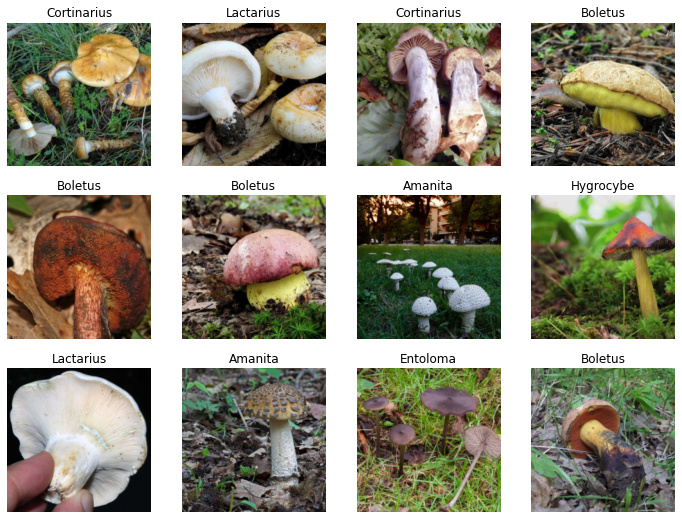

In [9]:
dls.valid.show_batch(max_n=12, nrows=3)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/DAVIDSON/nima/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.939896,0.987813,0.327628,00:18


epoch,train_loss,valid_loss,error_rate,time
0,1.079205,0.704340,0.243684,00:18
1,0.726759,0.579230,0.195599,00:18
2,0.421738,0.513997,0.161369,00:18
3,0.251492,0.502868,0.158109,00:18


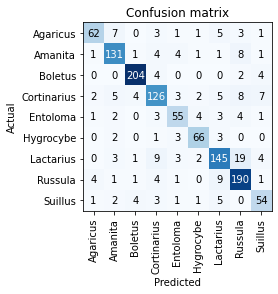

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
torch.save(learn, "model")

In [14]:
model = torch.load('./model')
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

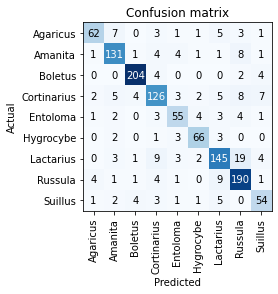

In [15]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()